# TD1: Introducción a Jupyter Python y análisis de frecuencia


$\textbf{Objetivo}$: Al final de esta sesión, podrá analizar una señal en Python. Más detalladamente, será capaz de:
* Leer, escribir y escuchar una señal en formato $\texttt{.wav}$.
* Graficar la representación temporal de una señal, con escala de tiempo en segundos.
* Graficar la representación espectral de una señal, en decibelios, y con escala de frecuencia en $Hz$.

Además, desarrollará la capacidad de:
* Elegir los parámetros del análisis de acuerdo con los datos del problema.
* Interpretar la representación temporal o espectral de una señal, en particular identificando parciales sinusoidales y midiendo sus características (período, frecuencia, amplitud, ancho de lóbulos principales, atenuación de los lóbulos secundarios, pendiente espectral).


# Introducción a Jupyter Python

## Ejercicio 1

Utilizando las funciones disponibles en el paquete $\texttt{soundfile}$ de Python, abra alguno de los archivos $\texttt{.wav}$ proporcionados, y luego reproduzcalo mediante la función $\texttt{Audio}$.

In [107]:
import soundfile as sf
from IPython.display import Audio 

# Abrir el archivo...
#https://pysoundfile.readthedocs.io/en/latest/
data, samplerate = sf.read('oboe-A4.wav')

# Y reproducirlo...
#https://musicinformationretrieval.com/ipython_audio.html
Audio(data, rate=samplerate)

## Ejercicio 2

Utilizando las funciones disponibles en el paquete $\texttt{matplotlib.pyplot}$ y la información obtenida a partir del audio del ejercicio anterior, grafique la señal de audio etiquetando claramente cada eje. Además, para el caso del eje temporal, **expréselo en segundos** (y no en muestras).

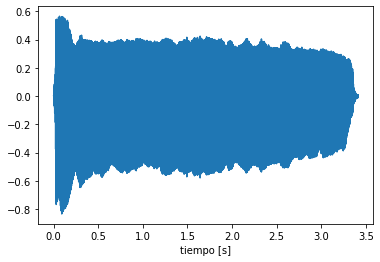

In [119]:
import matplotlib.pyplot as plt
import numpy as np
T=len(data)/samplerate
#Periodo total de la señal

t=np.linspace(0,T,int(T*samplerate))
#T*samplerate da el número de muestras
#Separa en bins iguales ese periodo de tiempo

plt.figure()
plt.xlabel('tiempo [s]')
plt.plot(t, data)


# Análisis de frecuencia

## Ejercicio 1

1. Utilizando las funciones disponibles en el paquete $\texttt{numpy.fft}$ obtenga la transformada de fourier discreta de la señal de audio obtenida anteriormente.

2. Además, grafique la magnitud, la magnitud en decibeles y la fase de la señal, etiquetando cada eje y titulando cada gráfico. 
    1. Exprese el eje de las frecuencias en $Hz$.
    2. Exprese el eje de las frecuencias como frecuencia normalizada $\nu$ (ciclos por muestra, $f/F_s$). 

3. Comente acerca del comportamiento de la magnitud y la fase. ¿Por qué el gráfico de magnitud es simétrico?, ¿entre qué rangos de frecuencia y valor se mueven los gráficos (en $Hz$ y normalizada $\nu$)?, ¿cuál podría ser el efecto del valor de la frecuencia de muestreo $F_s$ tanto en tiempo como en frecuencia? Comente.

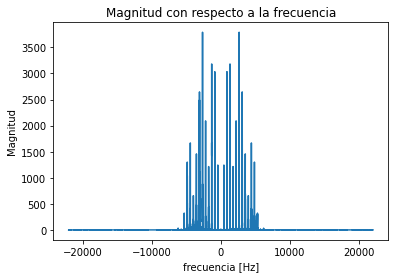

In [135]:
transformada=np.fft.fftshift(np.fft.fft(data))

#magnitud con respecto a f en Hz
#Ancho de banda de la transformada de fourier
B=samplerate/2
u=np.linspace(-B,B,int(T*samplerate))
plt.figure()
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title("Magnitud con respecto a la frecuencia")
transformada_abs=np.abs(transformada)
plt.plot(u,transformada_abs)



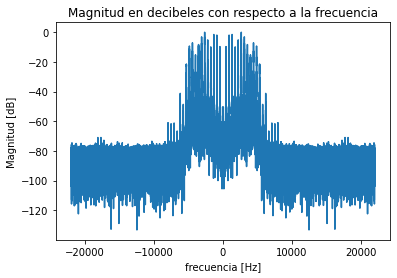

In [75]:
#magnitud en decibeles con respecto a f en Hz
plt.figure()
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia")
plt.plot(u,20*np.log10(transformada_abs/np.max(transformada_abs)))

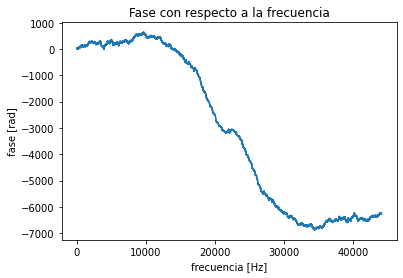

In [76]:
#fase con respecto a f en Hz
fase=np.angle(transformada)
#acumula el desfase
fase=np.unwrap(fase)
u_1=np.linspace(0,B*2,int(T*samplerate))
plt.figure()
plt.xlabel('frecuencia [Hz]')
plt.ylabel('fase [rad]')
plt.title("Fase con respecto a la frecuencia")
plt.plot(u_1,fase)


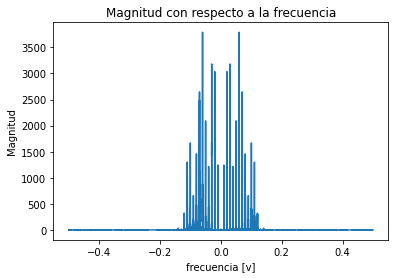

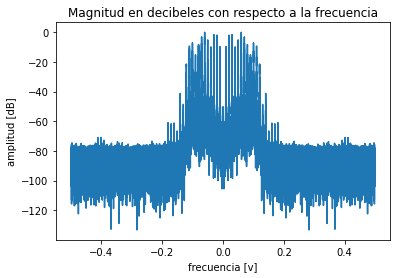

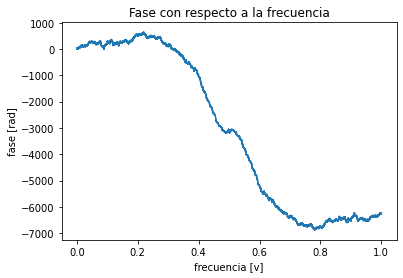

In [77]:
# Se repite el procedimiento para frecuencia normalizada
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('Magnitud')
plt.title("Magnitud con respecto a la frecuencia")
plt.plot(u/samplerate,transformada_abs)

plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia")
plt.plot(u/samplerate,20*np.log10(transformada_abs/np.max(transformada_abs)))

plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('fase [rad]')
plt.title("Fase con respecto a la frecuencia")
plt.plot(u_1/samplerate,fase)


El gráfico en magnitud es símetrico debido a que la señal es real, y por ende su transformada es hermitiana (parte real par y parte imaginaria impar). Por lo que al obtener la magnitud queda simétrica.

En rango de frecuecuencia, la transformada está definida en intervalos de 1/samplerate, lo que corresponde a 44100 Hz. En general se graficó entre -(1/samplerate)/2 y (1/samplerate)/2, (-22050 Hz,22050.0 Hz), ya que facilita visualizar la simetría con respecto al nivel DC. Dado que v corresponde a la frecuencia reducida, donde se divide f por la frecuencia de muestreo, el espectro se grafica (-0.5v,0.5v).

Si se aumenta la frecuencia de muestreo, en el tiempo se puede ver con una mejor resolución temporal la señal. En el dominio de la frecuencia esto aumenta el rango de frecuencias donde se puede analizar el espectro de la señal. Esto reduce las frecuencias que son mal representadas debido al aliasing.

Con respecto a la fase, se puede ver que esta para la segunda mitad del espectro se tiene la fase de la primera mitad pero reflejada con respecto a un eje horizontal. Esto se debe a que estos valores de f representan frecuencias 'negativas', que es equivalente a un desfase de 180 (fase opuesta).

## Ejercicio 2

El $\textit{zero padding}$ es una técnica que consiste en extender la señal en el dominio del tiempo con ceros al final de la señal $x[n]$ (para más detalle, revise $\href{https://ccrma.stanford.edu/~jos/mdft/Zero_Padding.html}{[1]}$, $\href{https://ccrma.stanford.edu/~jos/mdft/Causal_Periodic_Signals.html}{[2]}$ y $\href{https://ccrma.stanford.edu/~jos/mdft/Causal_Zero_Padding.html}{[3]}$). Estudie el efecto del $\textit{zero padding}$ sobre la magnitud de la respuesta de frecuencia del problema anterior. Comente sus resultados.

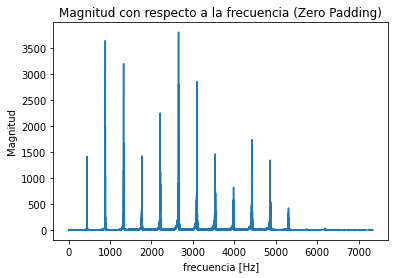

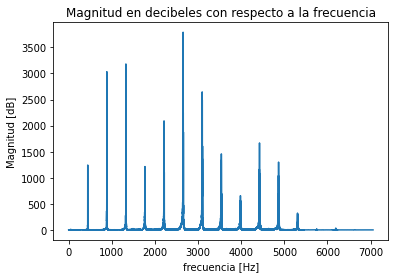

In [141]:
transformada=np.fft.fftshift(np.fft.fft(data,len(data)*30))
#magnitud con respecto a f en Hz
#Ancho de banda de la transformada de fourier
B_1=samplerate/2
u_1=np.linspace(-B_1,B_1,len(data)*30)
plt.figure()
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.title("Magnitud con respecto a la frecuencia (Zero Padding)")
plt.plot(u_1[int(len(data)*15):int(len(data)*20)],np.abs(transformada)[int(len(data)*15):int(len(data)*20)])

plt.figure()
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia")
plt.plot(u[int(len(data)/2):int(len(data)/2*1.32)],transformada_abs[int(len(data)/2):int(len(data)/2*1.32)])


Al usar zero padding se interpola entre los puntos del espectro original. Esto no agrega información adicional, pero tiene beneficios al calcular la fft, ya que permite que la señal pueda ser de potencia de 2, y permite que la transformada se vea levemente mejor.

## Ejercicio 3

Utilizando las funciones disponibles en los paquetes $\texttt{numpy.fft}$ y $\texttt{scipy.signal.windows}$ obtenga la transformada de fourier discreta (en dB y normalizada) de las siguientes ventanas:
* Hamming
* Hanning
* Blackman
* Kaiser
* Tukey

Comente en términos del ancho del lóbulo principal, ancho de los lóbulos laterales, amplitud máxima del primer lóbulo lateral (en decibeles) y caída espectral de los lóbulos laterales a medida que $\nu$ aumenta. Recuerde etiquetar cada eje y parametrizarlo en función de $\nu$.

In [13]:
from scipy import signal
N_1=100
N_2=1024

window_1 = signal.windows.hann(N_1)
window_2 = signal.windows.hamming(N_1)
window_3 = signal.windows.blackman(N_1)
window_4 = signal.windows.kaiser(N_1,2)
window_5 = signal.windows.kaiser(N_1,3)
window_6 = signal.windows.tukey(N_1)

c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


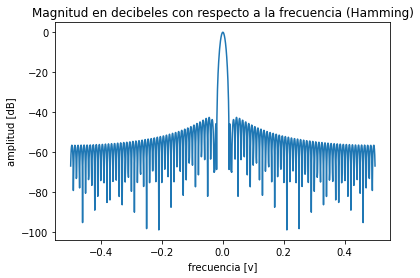

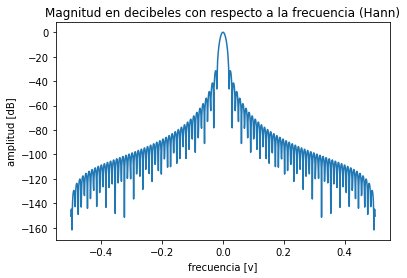

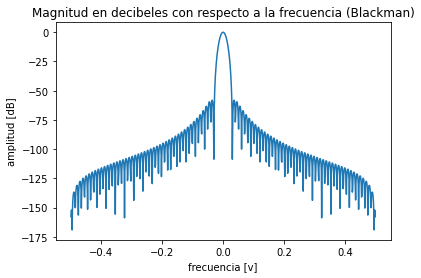

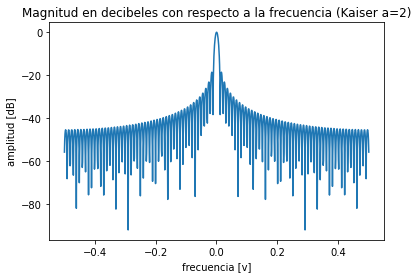

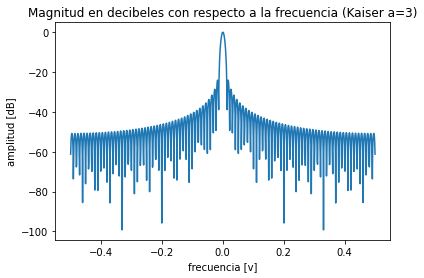

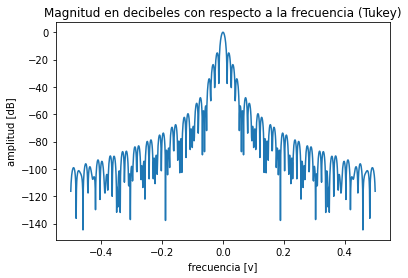

In [14]:
#1024 puntos en total
#zero padding pq la ventana hace cero lo que está fuera de esta
trans_window=np.fft.fftshift(np.fft.fft(window_2,1024))
n=np.linspace(-0.5,0.5,N_2)

#Hamming
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Hamming)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

#Hann
trans_window=np.fft.fftshift(np.fft.fft(window_1,1024))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Hann)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

#Blackman
trans_window=np.fft.fftshift(np.fft.fft(window_3,1024))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Blackman)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

#Kaiser alpha=2
trans_window=np.fft.fftshift(np.fft.fft(window_4,1024))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Kaiser a=2)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

#Kaiser alpha=3
trans_window=np.fft.fftshift(np.fft.fft(window_5,1024))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Kaiser a=3)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

#Tukey
trans_window=np.fft.fftshift(np.fft.fft(window_6,1024))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Tukey)")
plt.plot(n,20*np.log10(np.abs(trans_window)/np.max(np.abs(trans_window))))

Con respecto a la ventana hamming, se puede ver que el ancho del lóbulo central es de tamaño intermedio. También se puede apreciar que el ancho de los lóbulos laterales es pequeño. En el caso del primer lóbulo lateral, este tiene una amplitud cercana -50 dB, lo que es bajo en comparación la ventana Hann por ejemplo. Finalmente, se puede ver que la amplitud de los lóbulos laterales disminuye con una pendiente baja en comparación a otras ventanas como la Hann o la Blackman.

Analizando la ventana Hann, se puede ver que el ancho del lóbulo central más grande con respecto a la Hamming. Esto se repite para el ancho de los lóbulos laterales. Observando el primer lóbulo lateral, este tiene una amplitud mayor al de la ventana Hamming, con valor cercano a los -40 dB. Finalmente, en esta ventana la pendiente con la que disminuyen los lóbulos laterales es mucho mayor con respecto a la Hamming.

Con respecto a la ventana blackman, se puede ver que esta tiene el mayor ancho del lóbulo central. Con respecto a los lóbulos laterales, el ancho de estos es similar al de la Hann. En el caso del primer lóbulo lateral, este tiene la menor amplitud entre las ventanas analizadas, con un valor menor a los -60 dB. Finalmente, se puede que los lóbulos laterales disimuyen con una pendiente similar a la vista para la Hamming, la cual era alta.

El ancho del lóbulo central de la ventana kaiser es el menor de todas las ventanas, y aumenta con el valor de alpha. El ancho de los lóbulos laterales es similar al visto en la hamming. La magnitud del primer lóbulo lateral es el segundo más alto entre las ventanas, con un valor cercano a los -20 dB. Más aún, la magnitud de este lóbulo disminuye a medida que crece alpha. Finalmente, la pendiente con la que disminuye la amplitud de los lóbulos laterales es prácticamente igual a la presente an la hamming.

Con respecto a la tukey, en ancho del lóbulo central es similar al de la hamming. Más aún, se puede apreciar que la Tukey tiene el ancho más grande de los lóbulos laterales. Al analizar el tamaño del primer lóbulo lateral, se puede ver que este tiene la amplitud más alta entre las ventanas, con un valor superior a los -20 dB. Finalmente, la pendiente con la que disminuye la amplitud de los lóbulos laterales es similar al de la Hann y Blackman.


## Ejercicio 4

Aplique una ventana sobre su señal de audio, y obtenga la magnitud de su respuesta de frecuencia en la escala normal y en decibeles. Compare su respuesta de frecuencia con la obtenida en el ejercicio 1. Las ventanas a estudiar serán:
1. Hamming
2. Blackman
3. Kaiser

Comente los resultados que le parezcan relevantes. Recuerde etiquetar cada eje y parametrizarlo en función de $\nu$. 

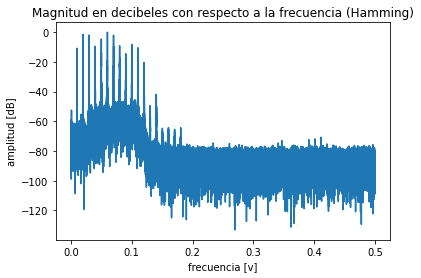

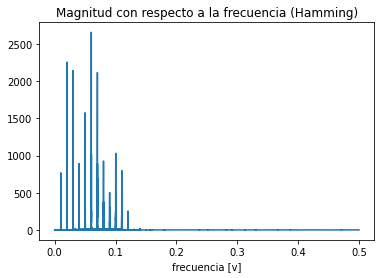

In [30]:
hamming = signal.windows.hamming(len(data))
data_hamming = data*hamming

data_window=np.fft.fftshift(np.fft.fft(data_hamming))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Hamming)")
plt.plot((u/samplerate)[int(len(data_window)/2):],20*np.log10(np.abs(data_window)/np.max(np.abs(data_window)))[int(len(data_window)/2):])

plt.figure()
plt.xlabel('frecuencia [v]')
plt.title("Magnitud con respecto a la frecuencia (Hamming)")
plt.plot((u/samplerate)[int(len(data_window)/2):],np.abs(data_window)[int(len(data_window)/2):])


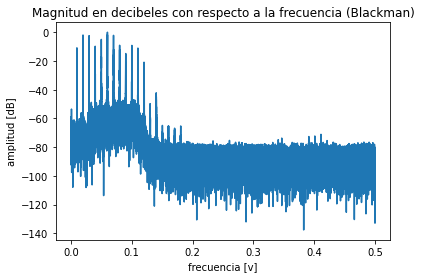

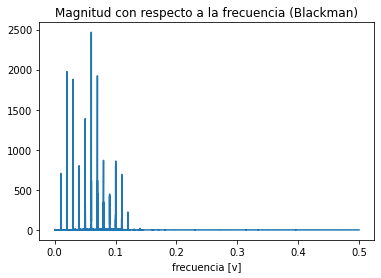

In [37]:
blackman = signal.windows.blackman(len(data))
data_blackman = data*blackman

data_window=np.fft.fftshift(np.fft.fft(data_blackman))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Blackman)")
plt.plot((u/samplerate)[int(len(data_window)/2):],20*np.log10(np.abs(data_window)/np.max(np.abs(data_window)))[int(len(data_window)/2):])

plt.figure()
plt.xlabel('frecuencia [v]')
plt.title("Magnitud con respecto a la frecuencia (Blackman)")
plt.plot((u/samplerate)[int(len(data_window)/2):],np.abs(data_window)[int(len(data_window)/2):])

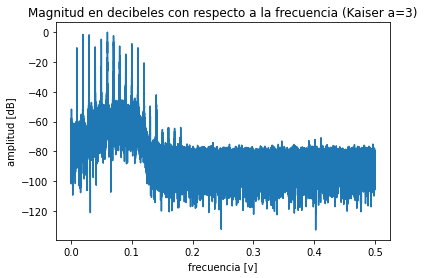

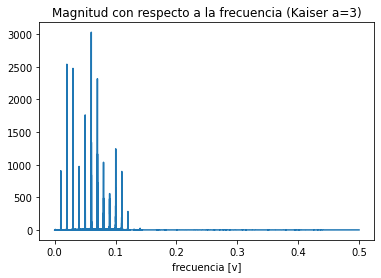

In [36]:
kaiser = signal.windows.kaiser(len(data),3)
data_kaiser = data*kaiser

data_window=np.fft.fftshift(np.fft.fft(data_kaiser))
plt.figure()
plt.xlabel('frecuencia [v]')
plt.ylabel('amplitud [dB]')
plt.title("Magnitud en decibeles con respecto a la frecuencia (Kaiser a=3)")
plt.plot((u/samplerate)[int(len(data_window)/2):],20*np.log10(np.abs(data_window)/np.max(np.abs(data_window)))[int(len(data_window)/2):])

plt.figure()
plt.xlabel('frecuencia [v]')
plt.title("Magnitud con respecto a la frecuencia (Kaiser a=3)")
plt.plot((u/samplerate)[int(len(data_window)/2):],np.abs(data_window)[int(len(data_window)/2):])

En términos generales, se puede ver que el espectro se ve levemente atenuado con respecto al original al implementar las ventanas. Al observar las altas frecuencias en el espectro en dB, se puede ver que para todas las ventanas la magnitud de este contenido se mantuvo cerca de -80 dB, prácticamente igual al espectro original. Sin embargo, al usar la ventana blackman se puede ver que hay varios peaks cercanos a -140dB, lo que podría implicar que si atenua mejor las bajas frecuencias. Excluyendo esto, los tres espectros se ven similares al original.

## Ejercicio 5

Considere la señal $s(t) = \cos(\omega t) $ tal que $\omega = 2\pi (F_s / 4.1)$ y $T = 1$ (tiempo entre muestras). Obtenga la DFT de esta señal, graficando su magnitud en la escala normal y en decibeles para una señal de $N=64$ puntos, utilizando el comando $\texttt{stem}$. Recuerde etiquetar cada eje y parametrizarlo en función de $\nu$. 

<StemContainer object of 3 artists>

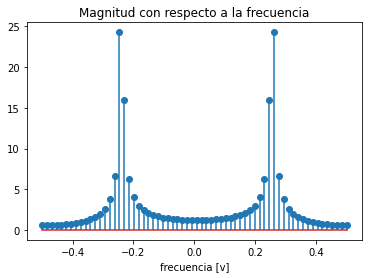

In [38]:
n=np.linspace(1,64,64)
cosine=np.cos(2*np.pi*(1/4.1)*n)
transformada=np.fft.fftshift(np.fft.fft(cosine))
n_1=np.linspace(-0.5,0.5,64)

plt.figure()
plt.xlabel('frecuencia [v]')
plt.title("Magnitud con respecto a la frecuencia")
plt.stem(n_1,np.abs(transformada))

## Ejercicio 6

Utilizando la señal $s(t)$ del ejercicio anterior ahora con $\omega = 2\pi (F_s/4)$ . Obtenga la DFT de esta señal, graficando su magnitud en la escala normal y en decibeles para una señal de $N=64$ puntos, utilizando el comando $\texttt{stem}$. ¿Por qué la magnitud de la respuesta de frecuencia no presenta desparrame espectral ($leakage$)?, ¿a qué puede deberse? Comente. Recuerde etiquetar cada eje y parametrizarlo en función de $\nu$. 

<StemContainer object of 3 artists>

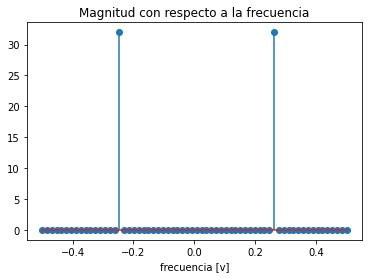

In [56]:
n=np.linspace(1,64,64)
cosine=np.cos(2*np.pi*(1/4)*n)
transformada=np.fft.fftshift(np.fft.fft(cosine))
n_1=np.linspace(-0.5,0.5,64)

plt.figure()
plt.xlabel('frecuencia [v]')
plt.title("Magnitud con respecto a la frecuencia")
plt.stem(n_1,np.abs(transformada))

La razón de porque no se derrame espectral es que el muestreo es periodico con respecto a la señal. Al muestrar una señal periódica, para evitar derrame el mismo valor de la señal tiene que ser muestreado a intervalos regulares. Si al pasar un periodo de la señal original, se muestrea en un instante de la señal marginalmente distinto al que se muestreo en el periodo anterior, se genera derrame.

## Ejercicio 7

Utilizando la señal de audio no2 del archivo "Archivos de audio con DTMF de números" disponible en el módulo "Espectro", identifique la secuencia de números correspondiente segun la condificación DTMF. Recuerde elegir correctamente los parametros para la detección de las frecuencias y justifique su elección. 

In [40]:
data, samplerate = sf.read('no2.wav')
data=data-np.average(data)
Audio(data, rate=samplerate)

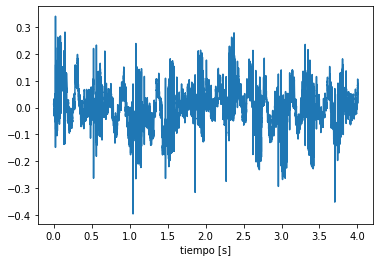

In [41]:
T=len(data)/samplerate
#Periodo total de la señal

t=np.linspace(0,T,int(T*samplerate))
#T*samplerate da el número de muestras
#Separa en bins iguales ese periodo de tiempo
plt.figure()
plt.xlabel('tiempo [s]')
plt.plot(t, data)

Dado que los números están espaciados temporalmente por un periodo relativamente grande, no es necesario una ventana temporal corta para determinar los instantes donde se aprieta cada tecla. Además, esto empeoraría la resolución del espectro de la señal. Con esto en mente, menor frecuencia de separación entre las sinusoides de la DTMF es cercana a los 90Hz, por lo que se necesita una resolución mejor a esta. Luego, si se usa 800 muestras por segundo para la ventana, entonces el espectro entre 0 y 4000 Hz se divide en 400 muestras, lo que da una resolución de 5hz, que es suficiente para lo que se busca hacer.

c:\users\7cg2r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


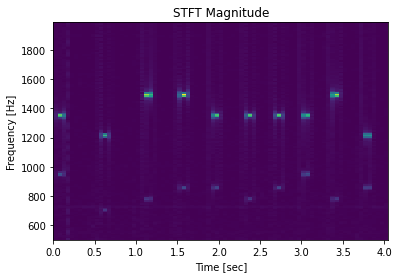

In [45]:
#Citado de https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
f, t, Zxx = signal.stft(data, samplerate, nperseg=800)
plt.pcolormesh(t, f[50:200], np.abs(Zxx[:][50:200]))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Viendo el espectro con respecto al tiempo, se obtuvo que el número telefónico es el siguiente.

In [93]:
#0169858067